In [137]:
#Black Scholes Merton model
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import random

In [138]:
# Risk free interest rate 
r = 0.1

#Share Price at t = 0 and volatility
S0 = 100
sigma = 0.3

#Call Option info, Strike price and time period
K = 110
T = 1

#Firm specific information
V0 = 200
sigma_firm = 0.25
debt = 180
#Recovery Rate - Amount of money you would receive if the company were to default
recovery_rate = 0.2

In [139]:
#Function to find terminal value
def terminal_value(S0,r,sigma,T,Z):
    return S0 * np.exp((r - sigma ** 2/2) * T + sigma * np.sqrt(T) * Z)


In [140]:
#Function to calculate call option payoff
def call_option_payoff(S,K):
    return np.maximum(S - K,0)


In [141]:
np.random.seed(0)

corr_tested = np.linspace(-1,1,21)
cva_estimates = [None] * len(corr_tested)
cva_std = [None] * len(corr_tested)

In [142]:
for i in range(len(corr_tested)):
    correlation = corr_tested[i]
    if(correlation == 1 or correlation == -1):
        norm_vec0 = norm.rvs(size = 50000)
        norm_vec1 = correlation * norm_vec0
        corr_normal_matrix = np.array([norm_vec0,norm_vec1])
    else :
        corr_matrix = np.array([[1,correlation],[correlation,1]])
        norm_matrix = norm.rvs(size = np.array([2,50000]))
        corr_normal_matrix = np.matmul(np.linalg.cholesky(corr_matrix),norm_matrix)
    
    term_stock_val = terminal_value(S0,r,sigma,T,corr_normal_matrix[0,])
    call_val = call_option_payoff(term_stock_val,K)
    term_firm_val = terminal_value(V0,r,sigma_firm,T,corr_normal_matrix[1,])
    amount_lost = np.exp(-r * T) * (1 - recovery_rate) * (term_firm_val < debt) * call_val
    cva_estimates[i] = np.mean(amount_lost)
    cva_std[i] = np.std(amount_lost) / np.sqrt(50000)

In [143]:
#Calculate default probability
d1 = ((np.log(V0)/debt) + (r + sigma_firm ** 2) * T) / (sigma_firm * np.sqrt(T))
d2 = d1 - sigma_firm * np.sqrt(T)
default_prob = norm.cdf(-d2)

In [144]:
#Analytical solution for vanilla European Call
d1_a = ((np.log(S0/K) + (r + sigma ** 2/2) * T) / (sigma * np.sqrt(T)))
d2_a = d1_a - sigma * np.sqrt(T)
analytical_price = S0 * norm.cdf(d1_a) - K * np.exp(-r * T) * norm.cdf(d2_a)

In [145]:
# Assuming 0 correlation, calculate CVA, this will be used as an error bound
uncorr_cva = (1 - recovery_rate) * default_prob * (analytical_price)

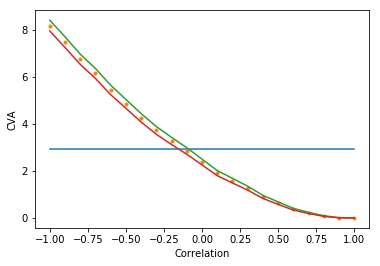

In [146]:
#Plot the CVA estimates for different correlations bounded by the 3 standard deviation and 0 correlation CVA
plt.plot(corr_tested,[uncorr_cva] * 21)
plt.plot(corr_tested,cva_estimates,'.')
plt.plot(corr_tested,cva_estimates + 3 * np.array(cva_std))
plt.plot(corr_tested,cva_estimates - 3 * np.array(cva_std))
plt.xlabel("Correlation")
plt.ylabel("CVA")
plt.show()

In [147]:
#Example - Blackberry stock price on 27th August 2019 was 6.86 USD

#Constructing Black Schole-Merton Model and simulating Blackberry stock price movements
S0 = 6.86
r1 = 0.01
sigma1 = 0.2
T1 = 1
I1 = 400
ST1 = S0 * np.exp((r1 - sigma1 ** 2/2) * T1 + sigma1 * np.sqrt(T) * np.random.standard_normal(I1))
L1 = 0.5 #(Average loss level (fixed))
p1 = 0.01 # probability of default

In [149]:
#General default scenarios using Poisson Distribution - this distribution is used in modelling rare events, suppose the counterparty goes bankrupt,etc

#Risk neutral value of the future index level is equal to the current value of the asset today if there is no default

D = np.random.poisson(p1 * T1,I1)
D = np.where(D > 1,1,D)

#Risk - Neutral Value
np.exp(-r1 * T) / I1 * np.sum(ST1)

CVar1 = np.exp(-r1 * T1) / I1 * np.sum(L1 * D * ST1)

#Present value of the asset adjusted for credit risk
S0_CVar1 = np.exp(-r1 * T1) / I1 * np.sum((1 - L1 * D) * ST1)

#Number of possible losses
np.count_nonzero(L1 * D * ST1)

4